In [1]:

import numpy as np
import nmrglue as ng
from pygamma import spin_system, Hcs, HJw, Fm, gen_op, sigma_eq, Iypuls, Ixpuls,evolve, FID, row_vector, Fp

from scipy import fftpack

import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

%matplotlib inline

In [2]:
dt1 = 0.002 # t1 time increment
dt2 = 0.002 # t2 time increment
t1pts = 1024 # points on t1 axis
t2pts = 1024 # points on t2 axis

In [3]:
sys=spin_system()     # define the system, read in
sys.read("cosy1.sys") # from disk

print( sys)

Spin Index :      0            1            2      
Isotope    :      1H           1H           1H     
Momentum   :     1/2          1/2          1/2     
Shifts     :     0.00 Hz      0.00 Hz      0.00 Hz 
           :     0.50 ppm     0.25 ppm     0.10 ppm
Js Spin 0  :                 10.00 Hz      0.00 Hz 
Js Spin 1  :                              15.00 Hz 
Omega      :   400.00 MHz   400.00 MHz   400.00 MHz



In [4]:
H = Hcs(sys)+ HJw(sys)                                    # // Hamiltonian, weak coupling
detect = gen_op(Fp(sys))                                  # // F+ for detection operator
fid = row_vector(t2pts)                                    #block_1D tmp(t2pts); // 1D-data block storage


In [5]:
sigma0 = sigma_eq(sys)                      # // equilibrium density matrix
sigma1 = Iypuls(sys, sigma0, 90)     

In [6]:
FID(sigma1,detect,H,dt2,t2pts,fid)

In [7]:
npfid = fid.toNParray()

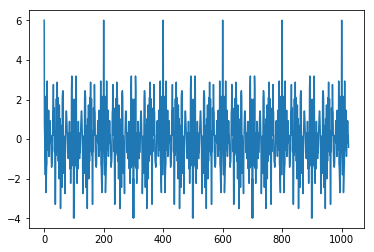

In [8]:
plt.plot(npfid.real)

In [9]:
npfid = npfid * numpy.exp(-dt1*numpy.arange(t2pts)*5.)

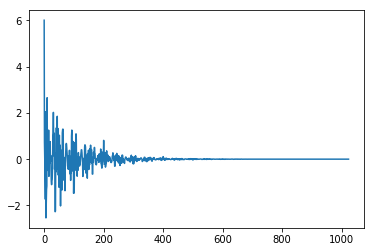

In [10]:
plt.plot(npfid.real)

In [11]:
pygamma.exponential_multiply(fid,-5)

In [12]:
spec = fid.FFT()

In [13]:
type(spec)

pygamma.row_vector

In [14]:
npspec = spec.toNParray()

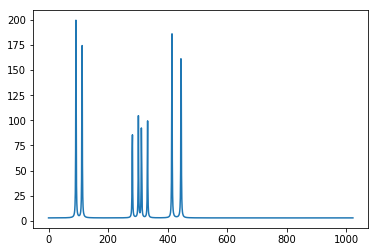

In [15]:
plt.plot(npspec.real)

In [16]:
udic = {'ndim': 1,
         0: {'sw': 1/dt2,
          'complex': True,
          'obs': 400.0,
          'car': 0,
          'size': len(npspec),
          'label': '1H',
          'encoding': 'direct',
          'time': False,
          'freq': True}}

In [76]:
C = ng.convert.converter()

In [77]:
C.from_universal(udic,npspec)

In [78]:
pipe_dic,pipe_spec = C.to_pipe()

In [79]:
uc0 = ng.pipe.make_uc(pipe_dic,pipe_spec,dim=0)

In [85]:
type(uc0)

nmrglue.fileio.fileiobase.unit_conversion

In [100]:
pipe_spec.ndim, type(pipe_spec), len(npspec)

(1, numpy.ndarray, 1024)

In [102]:
uc00 = ng.fileiobase.unit_conversion(udic[0]['size'],udic[0]['complex'], udic[0]['sw'], udic[0]['obs'], udic[0]['car'])

In [103]:
print(dir(uc00))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_car', '_cplx', '_delta', '_first', '_obs', '_size', '_sw', '_unit_conversion__convert', '_unit_conversion__hz2pts', '_unit_conversion__ms2pts', '_unit_conversion__percent2pts', '_unit_conversion__pnt2unit', '_unit_conversion__ppm2pts', '_unit_conversion__pts2hz', '_unit_conversion__pts2ms', '_unit_conversion__pts2percent', '_unit_conversion__pts2ppm', '_unit_conversion__pts2sec', '_unit_conversion__pts2us', '_unit_conversion__sec2pts', '_unit_conversion__str2pnt', '_unit_conversion__unit2pnt', '_unit_conversion__us2pts', 'f', 'hz', 'hz_limits', 'hz_scale', 'i', 'ms', 'ms_limits', 'ms_scale', 'percent', 'percent_limits', 'percent_scal

In [104]:
uc00.hz_limits(), uc00.ppm_limits(), 1./dt2

((250.0, -249.51171875), (0.625, -0.623779296875), 500.0)

(0.625, -0.623779296875)

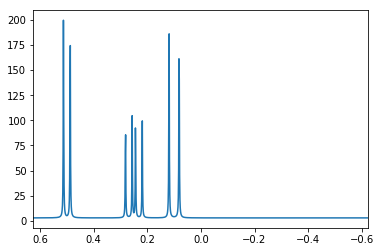

In [107]:
plt.plot(uc00.ppm_scale(), pipe_spec.real)
plt.xlim(uc00.ppm_limits())

In [106]:
print(dir(uc0))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_car', '_cplx', '_delta', '_first', '_obs', '_size', '_sw', '_unit_conversion__convert', '_unit_conversion__hz2pts', '_unit_conversion__ms2pts', '_unit_conversion__percent2pts', '_unit_conversion__pnt2unit', '_unit_conversion__ppm2pts', '_unit_conversion__pts2hz', '_unit_conversion__pts2ms', '_unit_conversion__pts2percent', '_unit_conversion__pts2ppm', '_unit_conversion__pts2sec', '_unit_conversion__pts2us', '_unit_conversion__sec2pts', '_unit_conversion__str2pnt', '_unit_conversion__unit2pnt', '_unit_conversion__us2pts', 'f', 'hz', 'hz_limits', 'hz_scale', 'i', 'ms', 'ms_limits', 'ms_scale', 'percent', 'percent_limits', 'percent_scal

In [82]:
uc0.ppm_scale()

array([ 0.625     ,  0.6237793 ,  0.62255859, ..., -0.62133789,
       -0.62255859, -0.6237793 ])

In [83]:
uc0.ppm_limits()

(0.625, -0.623779296875)

In [119]:
nmrexptdata = """
numDimensions: 1
swppm: 20
1HfreqMHz: 400.0
spinSystem:
    isotopes: [1H]
pulseSequence:
    p1:
        id: pulse1
        type: rfpulse_ideal
        shape: square
        angle: [90]
        phase: [0]
    delay:
        start: 100.0
        units: ms
    acquire:
        recphase: [0] 
"""

In [120]:
import yaml

In [121]:
print(dir(yaml))

['AliasEvent', 'AliasToken', 'AnchorToken', 'BaseDumper', 'BaseLoader', 'BlockEndToken', 'BlockEntryToken', 'BlockMappingStartToken', 'BlockSequenceStartToken', 'CBaseDumper', 'CBaseLoader', 'CDumper', 'CFullLoader', 'CLoader', 'CSafeDumper', 'CSafeLoader', 'CUnsafeLoader', 'CollectionEndEvent', 'CollectionNode', 'CollectionStartEvent', 'DirectiveToken', 'DocumentEndEvent', 'DocumentEndToken', 'DocumentStartEvent', 'DocumentStartToken', 'Dumper', 'Event', 'FlowEntryToken', 'FlowMappingEndToken', 'FlowMappingStartToken', 'FlowSequenceEndToken', 'FlowSequenceStartToken', 'FullLoader', 'KeyToken', 'Loader', 'MappingEndEvent', 'MappingNode', 'MappingStartEvent', 'Mark', 'MarkedYAMLError', 'Node', 'NodeEvent', 'SafeDumper', 'SafeLoader', 'ScalarEvent', 'ScalarNode', 'ScalarToken', 'SequenceEndEvent', 'SequenceNode', 'SequenceStartEvent', 'StreamEndEvent', 'StreamEndToken', 'StreamStartEvent', 'StreamStartToken', 'TagToken', 'Token', 'UnsafeLoader', 'ValueToken', 'YAMLError', 'YAMLLoadWarnin

In [122]:
yaml.load(nmrexptdata)

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """Entry point for launching an IPython kernel.


{'numDimensions': 1,
 'swppm': 20,
 '1HfreqMHz': 400.0,
 'spinSystem': {'isotopes': ['1H']},
 'pulseSequence': {'p1': {'id': 'pulse1',
   'type': 'rfpulse_ideal',
   'shape': 'square',
   'angle': [90],
   'phase': [0]},
  'delay': {'start': 100.0, 'units': 'ms'},
  'acquire': {'recphase': [0]}}}